# Breast cancer data

This project predicts whether the patient has malignant or benign breast cancer cells based on [Wisconsin Diagnostic Breast Cancer (WDBC)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) dataset.

It contains 30 input features based on which predictions (benign (B) or malignant (M)) are made.

Features are obtained from an image of Fine Needle Aspirate (FNA) of breast mass.
 There are 32 atributes: ID,diagnosis, 30 real-valued input features.



1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew,kurtosis

%matplotlib inline
fig_params={'legend.fontsize':18,
          'axes.labelsize': 18,
          'axes.titlesize':20,
          'xtick.labelsize':16,
          'ytick.labelsize':16,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)

In [2]:
col_names = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_stdEr', 'texture_stdEr', 'perimeter_stdEr', 'area_stdEr',
    'smoothness_stdEr', 'compactness_stdEr', 'concavity_stdEr',
    'concave_points_stdEr', 'symmetry_stdEr', 'fractal_dimension_stdEr',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df = pd.read_csv('./data/wdbc.data', names=col_names)

In [3]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop('ID',axis=1,inplace=True)
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_stdEr             569 non-null    float64
 12  texture_stdEr            569 non-null    float64
 13  perimeter_stdEr          569 non-null    float64
 14  area_stdEr               5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


There are 569 entries with no missing values.

## Exploratory data analysis

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

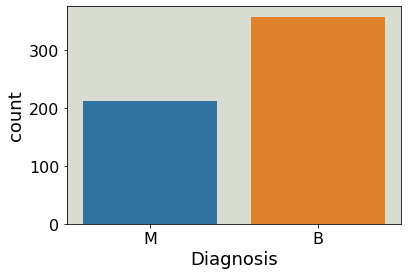

In [78]:
sns.countplot(data=df,x='Diagnosis')

In [80]:
def plotHist(df,featureName,target):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))   
    sns.histplot(ax=ax[0],data=df,x=featureName,bins=30,alpha=0.7,shrink=0.85)
    sns.boxplot(ax=ax[1],data=df,x=featureName)
    sns.histplot(ax=ax[2],data=df,x=featureName,bins=30,hue=target,alpha=0.7,shrink=0.85)
    #sns.countplot(ax=ax[1,1],data=df,x=featureName,hue=target)    
    plt.show()
    
    print('=='*20)    
    print('{0} mean : '.format(featureName),np.mean(df[featureName]))
    print('{0} variance : '.format(featureName),np.var(df[featureName]))
    print('{0} skewness : '.format(featureName),skew(df[featureName]))
    print('{0} kurtosis : '.format(featureName),kurtosis(df[featureName]))
    print('=='*20)

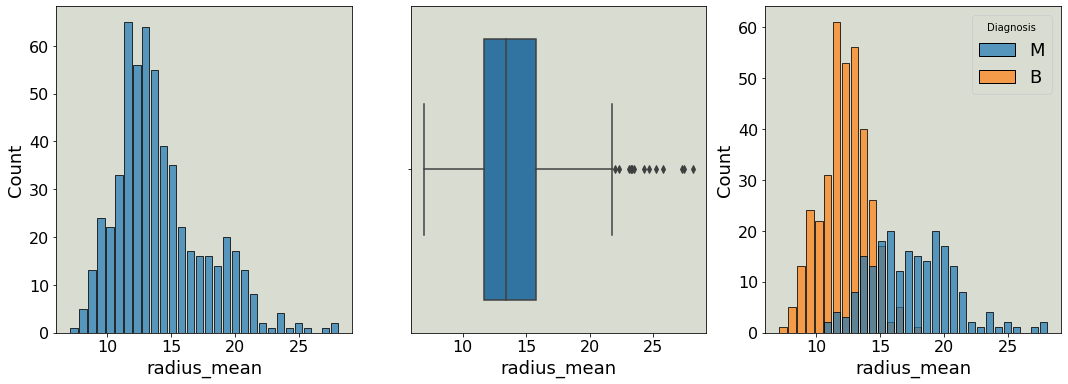

radius_mean mean :  14.127291739894563
radius_mean variance :  12.39709425935181
radius_mean skewness :  0.9398934455576345
radius_mean kurtosis :  0.8275836739140465


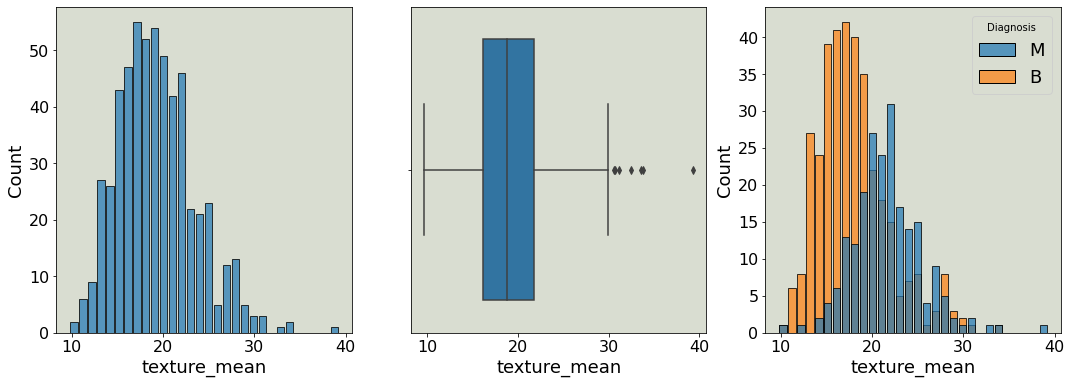

texture_mean mean :  19.28964850615117
texture_mean variance :  18.46639741599513
texture_mean skewness :  0.6487335672867014
texture_mean kurtosis :  0.74114542022429


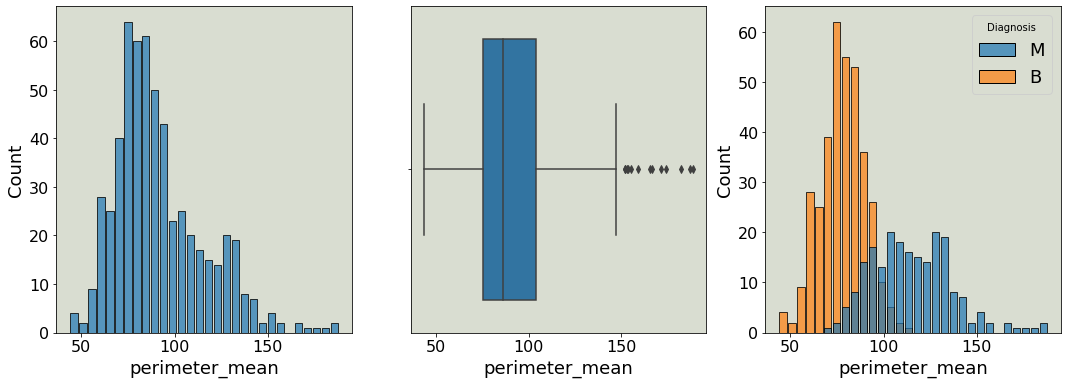

perimeter_mean mean :  91.96903339191566
perimeter_mean variance :  589.4027985384278
perimeter_mean skewness :  0.9880369541677213
perimeter_mean kurtosis :  0.9531650486734948


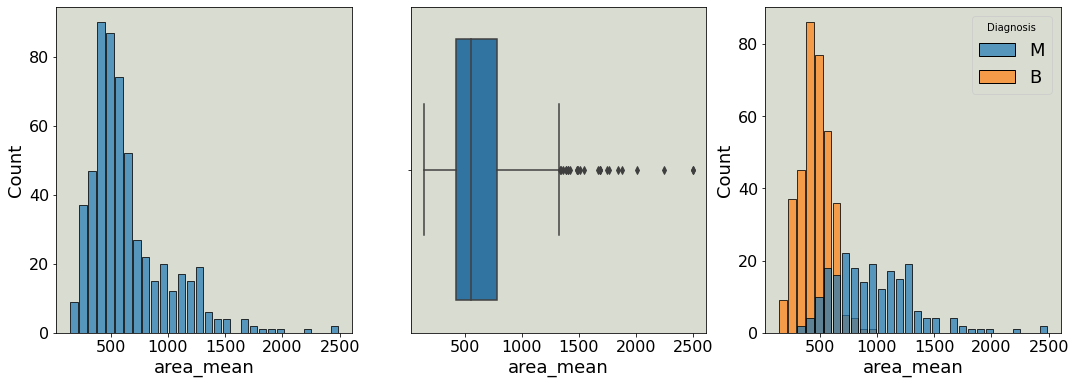

area_mean mean :  654.8891036906857
area_mean variance :  123625.90307986429
area_mean skewness :  1.6413905092044112
area_mean kurtosis :  3.609761264823108


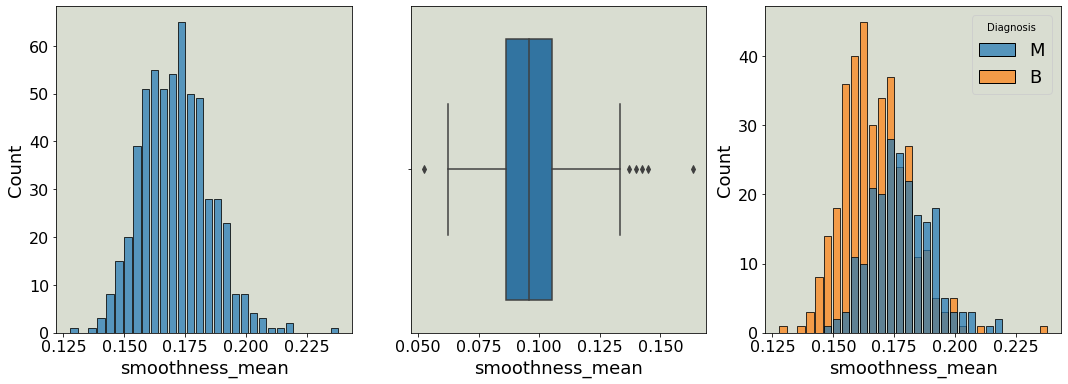

smoothness_mean mean :  0.096360281195079
smoothness_mean variance :  0.0001974520733831437
smoothness_mean skewness :  0.4551199203571718
smoothness_mean kurtosis :  0.837945350265711


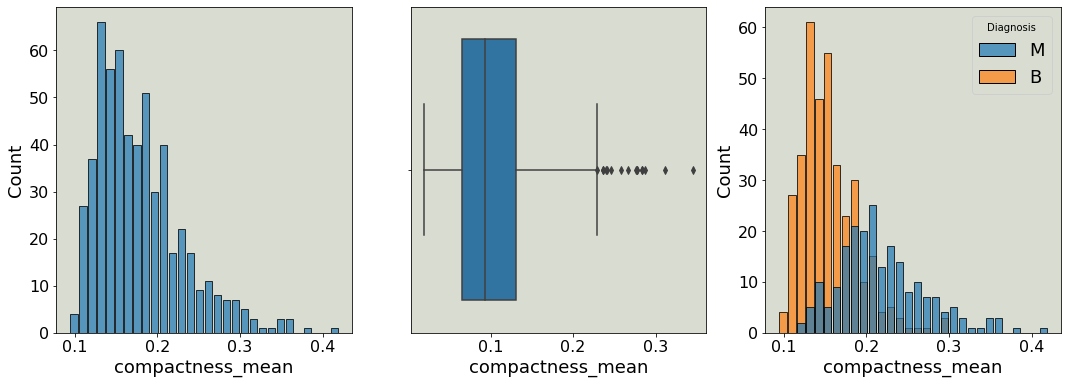

compactness_mean mean :  0.10434098418277686
compactness_mean variance :  0.002784285489365304
compactness_mean skewness :  1.186983323974523
compactness_mean kurtosis :  1.6251395163112745


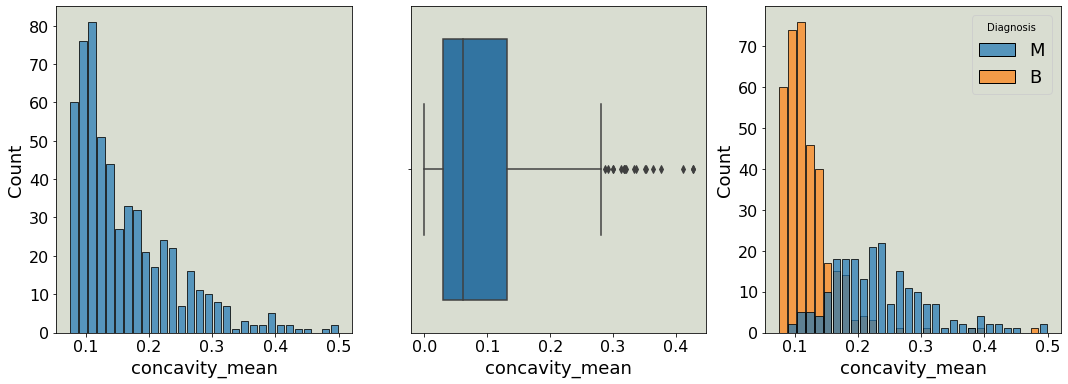

concavity_mean mean :  0.08879931581722322
concavity_mean variance :  0.006344078747698312
concavity_mean skewness :  1.3974832352826647
concavity_mean kurtosis :  1.9705916515788928


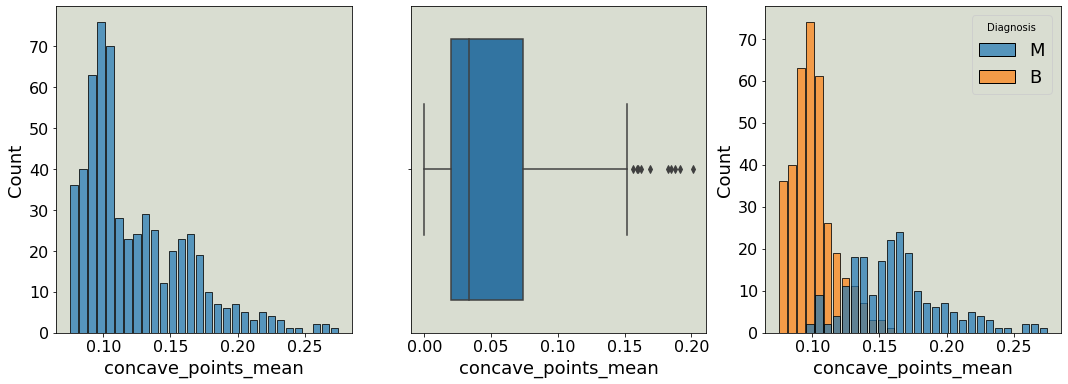

concave_points_mean mean :  0.048919145869947236
concave_points_mean variance :  0.0015030146166694059
concave_points_mean skewness :  1.1680903481012583
concave_points_mean kurtosis :  1.0466802239531967


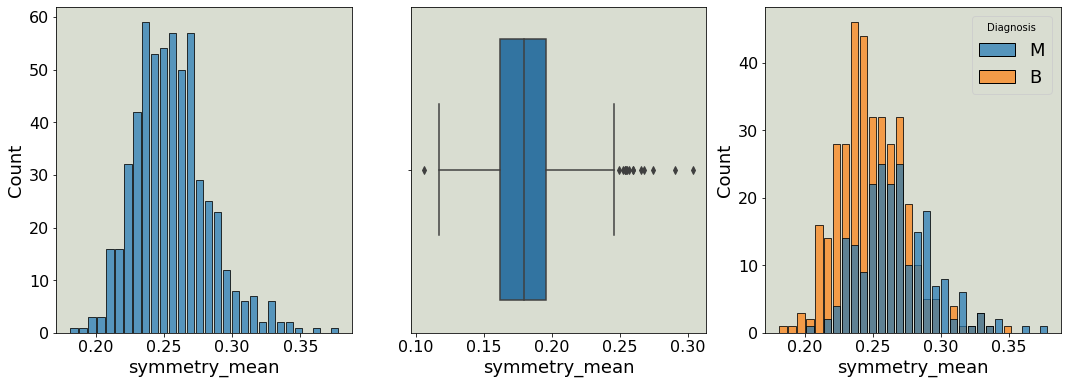

symmetry_mean mean :  0.181161862917399
symmetry_mean variance :  0.0007502220077773419
symmetry_mean skewness :  0.7236947177154984
symmetry_mean kurtosis :  1.26611697471047


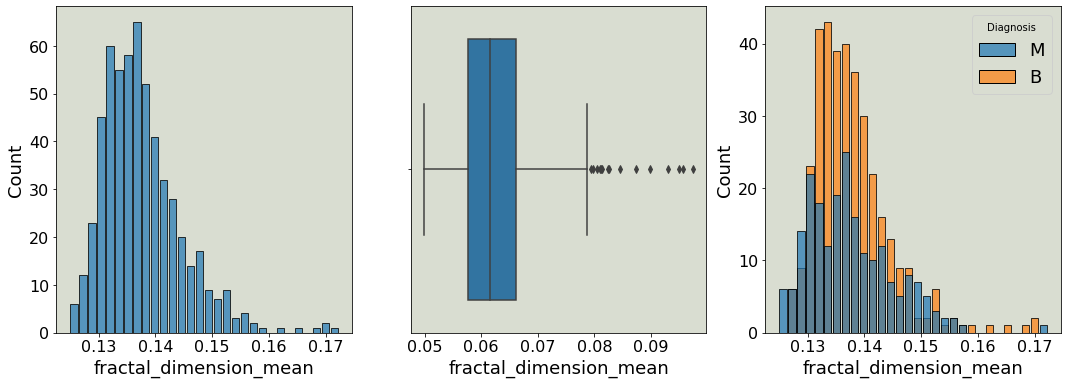

fractal_dimension_mean mean :  0.06279760984182778
fractal_dimension_mean variance :  4.976111520102792e-05
fractal_dimension_mean skewness :  1.3010473927890858
fractal_dimension_mean kurtosis :  2.9690168982858722


In [81]:
for featureName in df.columns[1:11]:
    plotHist(df,featureName,'Diagnosis')

<AxesSubplot:xlabel='radius_mean', ylabel='count'>

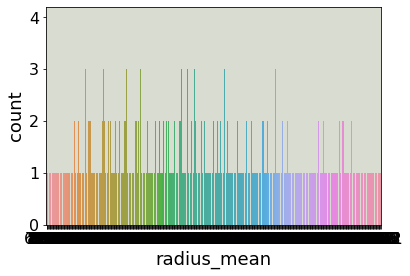

In [62]:
sns.countplot(data=df,x='radius_mean')

In [30]:
featureName='radius_mean'

In [34]:
' '.join(featureName.split('_'))

'radius mean'

<AxesSubplot:>

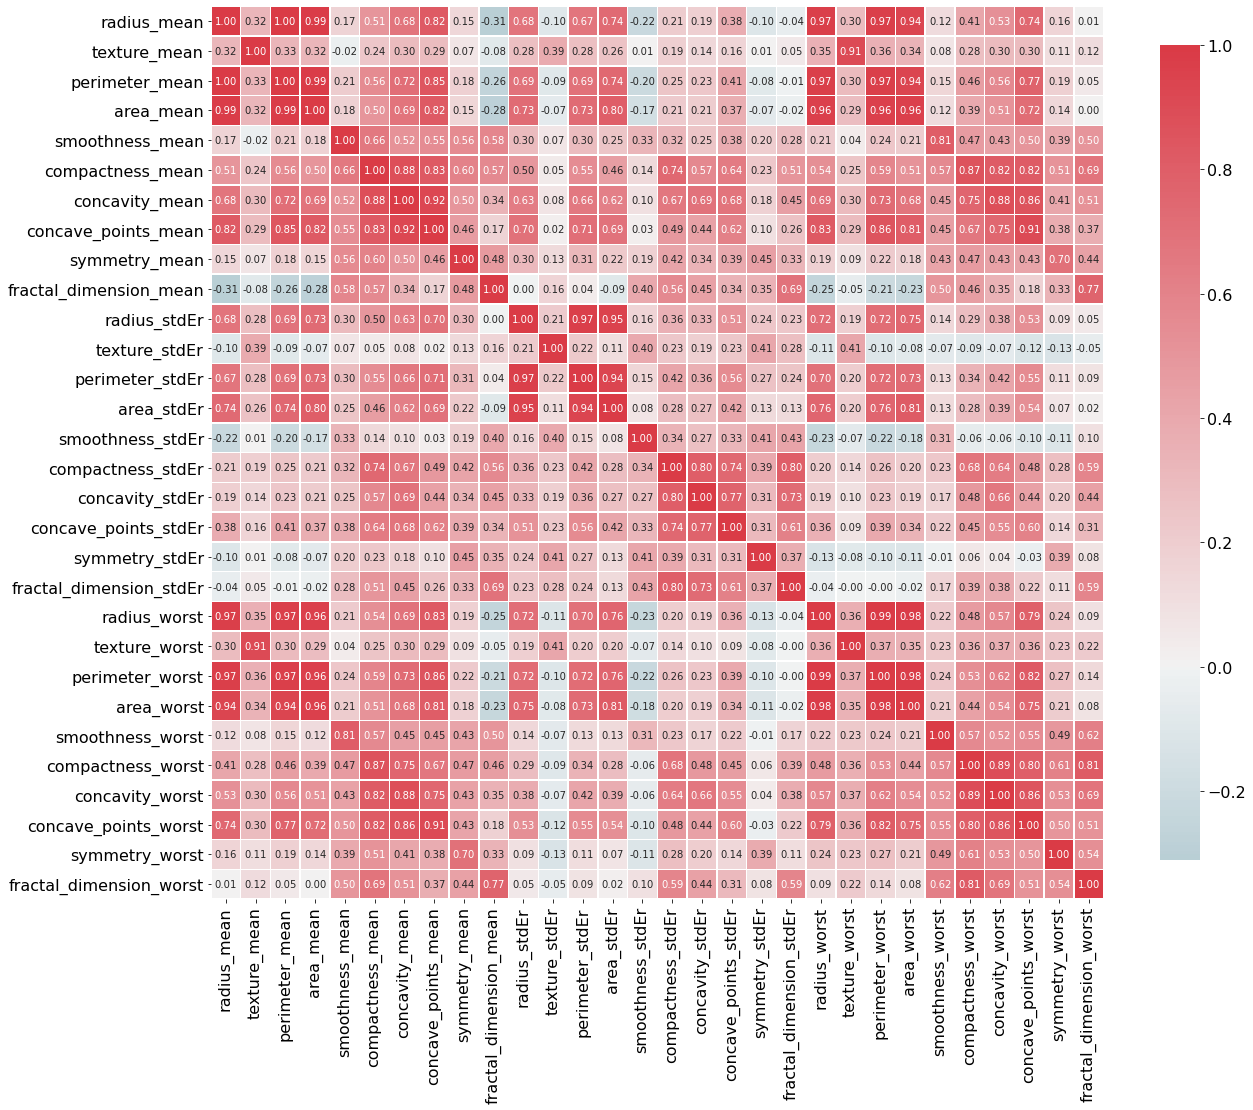

In [72]:
fig=plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})